In [1]:
#CIFAR10 datasets
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras import layers
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2022-09-12 14:57:13.530887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-12 14:57:13.530906: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)= cifar10.load_data()

In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print("x_train.shape :", x_train.shape)
print("y_train.shape :", y_train.shape)
print("x_test.shape :", x_test.shape)
print("y_test.shape :", y_test.shape)

x_train.shape : (50000, 32, 32, 3)
y_train.shape : (50000, 1)
x_test.shape : (10000, 32, 32, 3)
y_test.shape : (10000, 1)


In [5]:
index=1006
x_train[index]

array([[[ 91,  74,  64],
        [ 96,  76,  67],
        [ 94,  71,  63],
        ...,
        [ 41,  40,  37],
        [ 43,  42,  40],
        [ 41,  40,  38]],

       [[ 91,  75,  66],
        [ 91,  73,  65],
        [ 91,  70,  63],
        ...,
        [ 45,  44,  42],
        [ 49,  48,  46],
        [ 47,  46,  44]],

       [[ 86,  73,  64],
        [ 86,  71,  63],
        [ 84,  66,  59],
        ...,
        [ 36,  35,  34],
        [ 36,  35,  33],
        [ 31,  30,  28]],

       ...,

       [[ 91,  76,  73],
        [ 95,  75,  74],
        [ 86,  69,  66],
        ...,
        [129, 125, 115],
        [138, 125, 108],
        [168, 149, 127]],

       [[104,  91,  88],
        [104,  86,  84],
        [ 90,  74,  71],
        ...,
        [167, 163, 153],
        [174, 161, 144],
        [193, 174, 151]],

       [[ 96,  85,  80],
        [ 97,  81,  78],
        [ 95,  81,  78],
        ...,
        [120, 115, 105],
        [147, 134, 118],
        [151, 132, 109]]

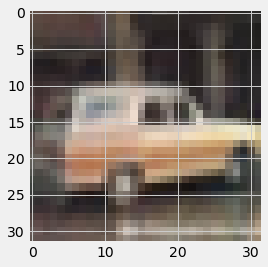

In [6]:
#Show image from dataset as a picture
img=plt.imshow(x_train[index])

In [7]:
#get the image label
print('The image label is :', y_train[index])

The image label is : [1]


In [8]:
#Classification of the images
classification= ['aeroplane', 'automobiles', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is :', classification[y_train[index][0]])

The image class is : automobiles


In [9]:
y_train_one_hot= to_categorical(y_train)
y_test_one_hot= to_categorical(y_test)

In [10]:
#print new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
print('The one hot label is : ', y_train_one_hot[index])

The one hot label is :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
#Normalize the pixel between 0 and 1
x_train=x_train/255
y_train=y_train/255

In [13]:
x_train[index]

array([[[0.35686275, 0.29019608, 0.25098039],
        [0.37647059, 0.29803922, 0.2627451 ],
        [0.36862745, 0.27843137, 0.24705882],
        ...,
        [0.16078431, 0.15686275, 0.14509804],
        [0.16862745, 0.16470588, 0.15686275],
        [0.16078431, 0.15686275, 0.14901961]],

       [[0.35686275, 0.29411765, 0.25882353],
        [0.35686275, 0.28627451, 0.25490196],
        [0.35686275, 0.2745098 , 0.24705882],
        ...,
        [0.17647059, 0.17254902, 0.16470588],
        [0.19215686, 0.18823529, 0.18039216],
        [0.18431373, 0.18039216, 0.17254902]],

       [[0.3372549 , 0.28627451, 0.25098039],
        [0.3372549 , 0.27843137, 0.24705882],
        [0.32941176, 0.25882353, 0.23137255],
        ...,
        [0.14117647, 0.1372549 , 0.13333333],
        [0.14117647, 0.1372549 , 0.12941176],
        [0.12156863, 0.11764706, 0.10980392]],

       ...,

       [[0.35686275, 0.29803922, 0.28627451],
        [0.37254902, 0.29411765, 0.29019608],
        [0.3372549 , 0

In [14]:
# create model architecture
model= Sequential()
# Add the first layer
model.add(Conv2D(32,(5,5),activation='relu', input_shape=(32,32,3)))
# Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2))) 
# Add another convolution  layer 
model.add(Conv2D(32,(5,5),activation='relu'))

2022-09-12 14:57:28.905884: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-12 14:57:28.905913: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-12 14:57:28.905949: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bishnu-ncuastro): /proc/driver/nvidia/version does not exist
2022-09-12 14:57:28.906225: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# Add a flattening layer
model.add(Flatten())
# Add a layer with 1000 neurons
model.add(Dense(1000,activation='relu'))
# Add a drop out layer
model.add(Dropout(0.5))
# Add a layer with 500 neurons
model.add(Dense(500,activation='relu'))
          # Add a drop out layer
model.add(Dropout(0.5))
          # Add a layer with 250 neurons
model.add(Dense(250,activation='relu'))
          # Add a layer with 10 neurons
model.add(Dense(10,activation='softmax'))

In [16]:
# compile the model
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
# Train the model
hist= model.fit(x_train,y_train_one_hot,
               batch_size=256,
               epochs=15,
               validation_split=0.2, verbose = True,
               )

Epoch 1/15
157/157 [==============================] - 8s 47ms/step - loss: 1.8002 - accuracy: 0.3270 - val_loss: 1.4694 - val_accuracy: 0.4583
Epoch 2/15
157/157 [==============================] - 7s 46ms/step - loss: 1.4222 - accuracy: 0.4809 - val_loss: 1.3152 - val_accuracy: 0.5279
Epoch 3/15
157/157 [==============================] - 7s 46ms/step - loss: 1.2887 - accuracy: 0.5362 - val_loss: 1.1884 - val_accuracy: 0.5797
Epoch 4/15
157/157 [==============================] - 7s 46ms/step - loss: 1.1946 - accuracy: 0.5720 - val_loss: 1.1515 - val_accuracy: 0.5889
Epoch 5/15
157/157 [==============================] - 9s 56ms/step - loss: 1.1253 - accuracy: 0.6001 - val_loss: 1.0749 - val_accuracy: 0.6183
Epoch 6/15
157/157 [==============================] - 9s 58ms/step - loss: 1.0484 - accuracy: 0.6267 - val_loss: 1.0746 - val_accuracy: 0.6189
Epoch 7/15
157/157 [==============================] - 9s 58ms/step - loss: 0.9888 - accuracy: 0.6487 - val_loss: 1.0318 - val_accuracy: 0.6385

In [21]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 2ms/step - loss: 148.1802 - accuracy: 0.5677


0.5677000284194946

<function matplotlib.pyplot.show(close=None, block=None)>

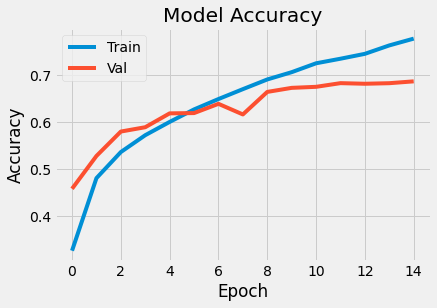

In [22]:
# visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

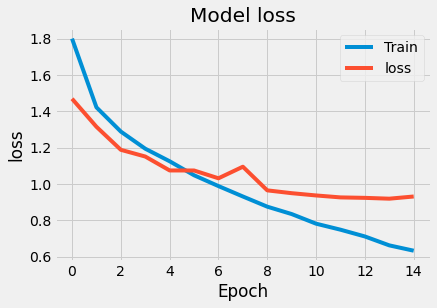

In [23]:
# visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','loss'], loc='upper right')
plt.show

(583, 500, 3) uint8 <class 'numpy.ndarray'>


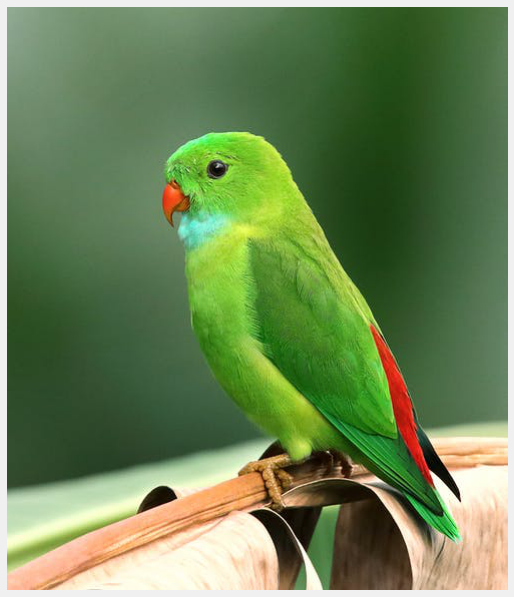

In [24]:
#Testing the model with example
import matplotlib.image as mpimg
import matplotlib.pylab as plt
im = mpimg.imread("bird.jpeg")  # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im))      # this image contains an α channel, hence num_channels= 4
# (960, 1280, 4) float32 <class 'numpy.ndarray'>
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()
  

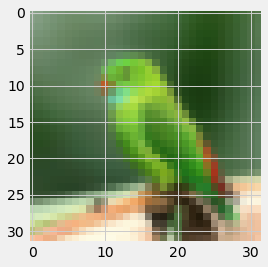

In [38]:
# Resize the image
from skimage.transform import resize
resized_image= resize(im , (32,32,3))
img= plt.imshow(resized_image)
img

In [39]:
#Get the predictions
pred= model.predict(np.array([resized_image]))
pred

1/1 [==============================] - 0s 10ms/step


array([[1.4358324e-03, 1.9465058e-05, 9.0438491e-01, 1.7161726e-03,
        5.6031417e-02, 3.4539957e-04, 3.4813605e-02, 7.5157546e-04,
        4.5385014e-04, 4.7699381e-05]], dtype=float32)

In [40]:
list_index= [0,1,2,3,4,5,6,7,8,9]
x= pred
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]> x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)
            

[2, 4, 6, 3, 0, 7, 8, 5, 9, 1]


In [41]:
# print the first 5 most likely classes
for i in range(10):
    print(classification[list_index[i]],':',round(pred[0][list_index[i]]* 100, 2),'%')

bird : 90.44 %
deer : 5.6 %
frog : 3.48 %
cat : 0.17 %
aeroplane : 0.14 %
horse : 0.08 %
ship : 0.05 %
dog : 0.03 %
truck : 0.0 %
automobiles : 0.0 %
